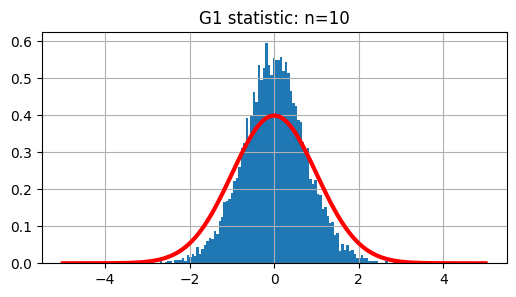

In [3]:
# compute skewness
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = 10 # sample size
X = np.random.normal(0, 1, (N, n))
G1 =np.sqrt(n / 6) * skew(X, axis=1, bias=True)

fig = plt.figure(figsize=(6, 3))
plt.hist(G1, bins=100, density=True)
plt.title('G1 statistic: n={}'.format(n))
# draw the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
plt.grid()
plt.show()
# print(s)


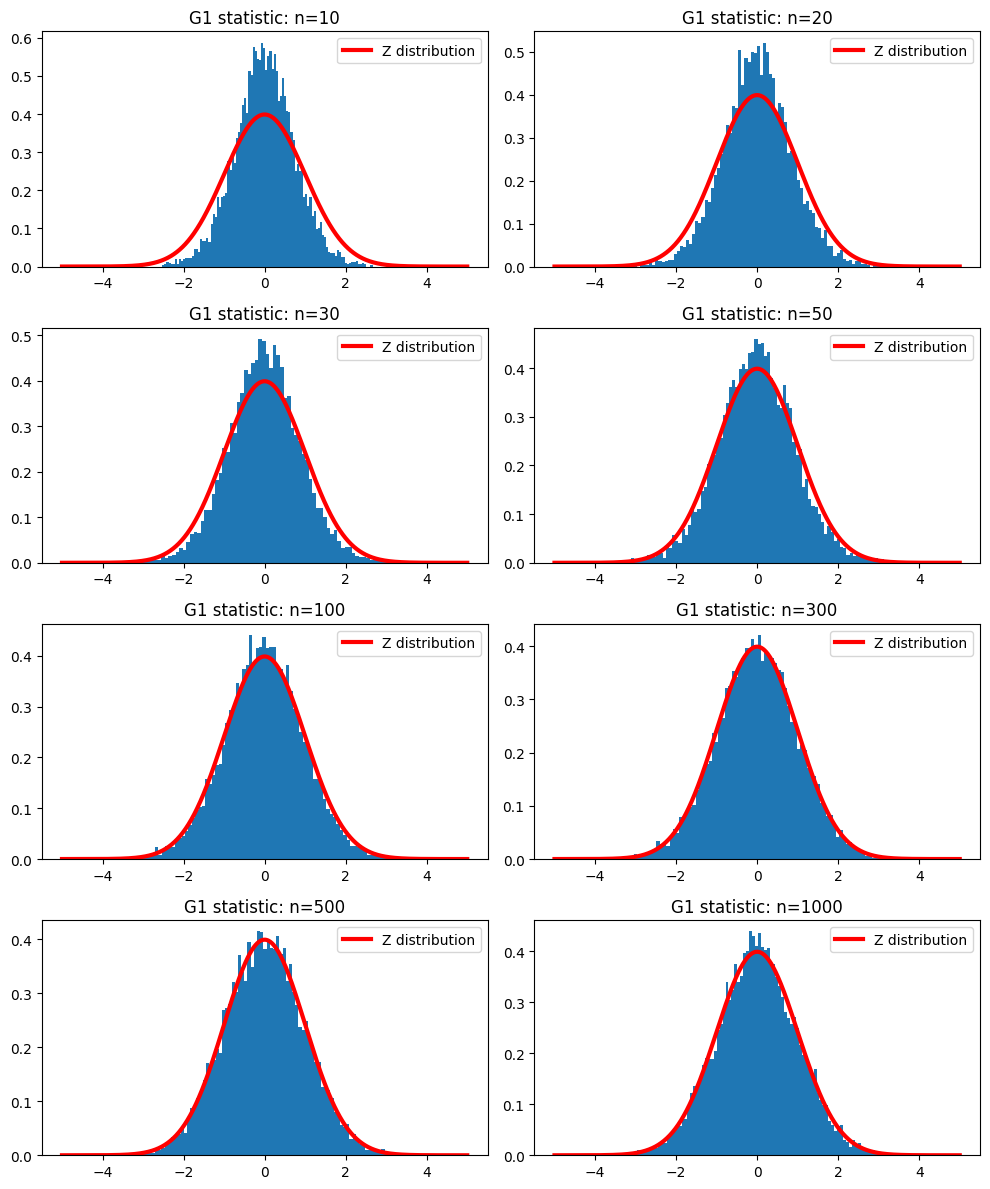

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000]   # sample size
G1 = np.zeros((N, len(n)))

for i in range(len(n)):
    X = np.random.normal(0, 1, (N, n[i]))
    G1[:, i] = np.sqrt(n[i] / 6) * skew(X, axis=1, bias=True)

#draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize=(10, 12))
for i in range(len(n)):
    plt.subplot(4, 2, i + 1)
    plt.hist(G1[:, i], bins=100, density=True)
    plt.title('G1 statistic: n={}'.format(n[i]))
    # draw the normal distribution
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
    plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

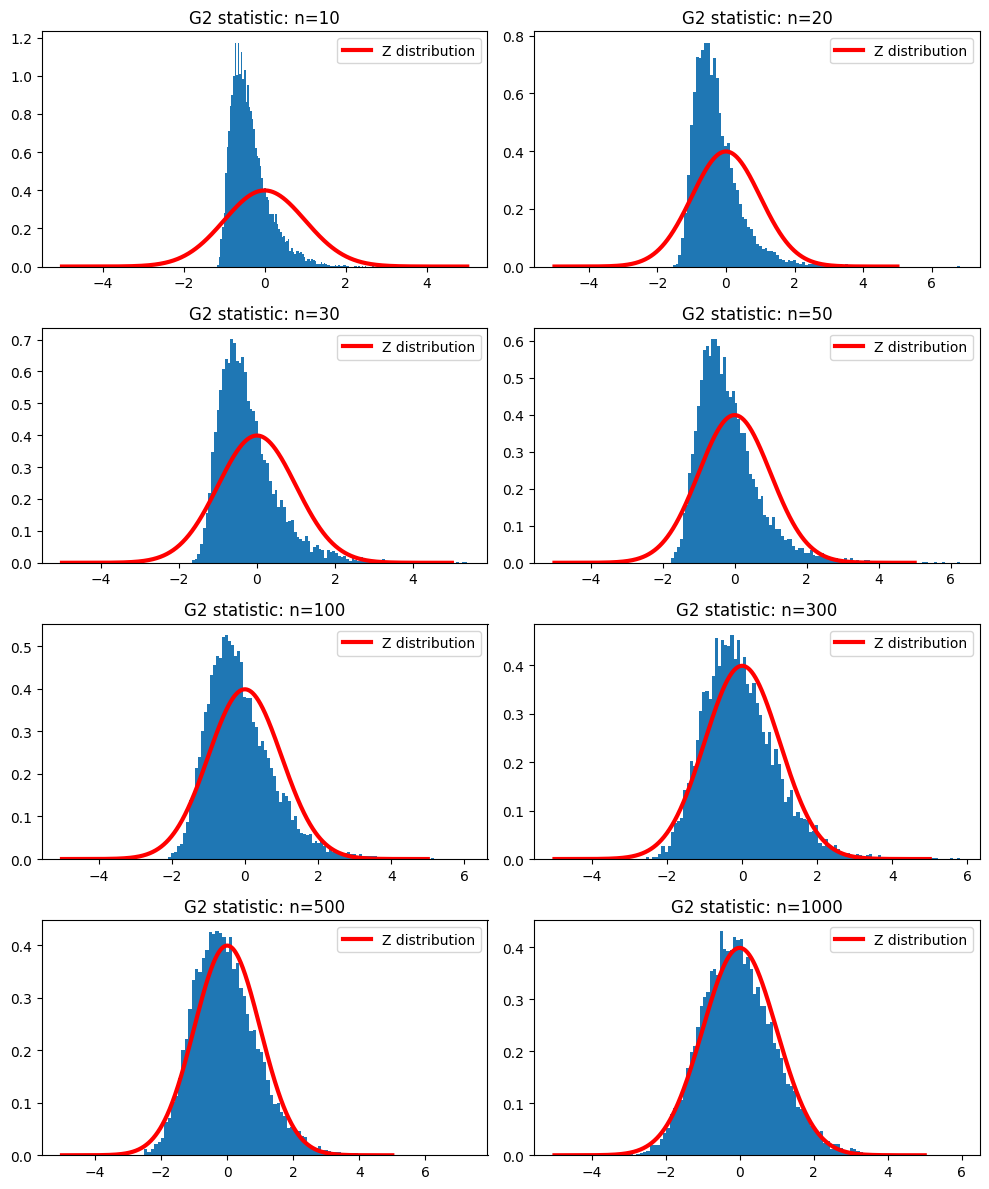

In [27]:
# do the same for kurtosis
G2 = np.zeros((N, len(n)))

for i in range(len(n)):
    X = np.random.normal(0, 1, (N, n[i]))
    G2[:, i] = kurtosis(X, axis=1, bias=True, fisher=True) * np.sqrt(n[i] / 24)

#draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize=(10, 12))
for i in range(len(n)):
    plt.subplot(4, 2, i + 1)
    plt.hist(G2[:, i], bins=100, density=True)
    plt.title('G2 statistic: n={}'.format(n[i]))
    # draw the normal distribution
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
    plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

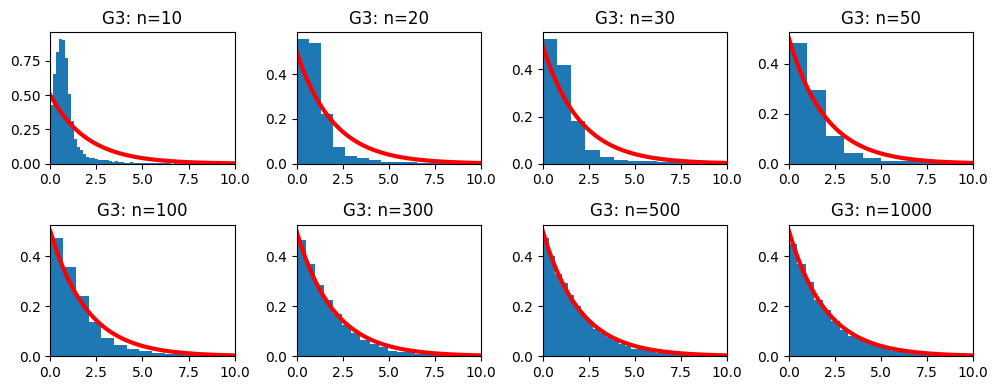

In [44]:
# do the same for G3 = G1^2 + G2^2
from scipy.stats import chi2

G3 = np.zeros((N, len(n)))

for i in range(len(n)):
    X = np.random.normal(0, 1, (N, n[i]))
    G1 = np.sqrt(n[i] / 6) * skew(X, axis=1, bias=True)
    G2 = kurtosis(X, axis=1, bias=True, fisher=True) * np.sqrt(n[i] / 24)
    G3[:, i] = G1**2 + G2**2

#draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize=(10, 4))
for i in range(len(n)):
    plt.subplot(2, 4, i + 1)
    plt.hist(G3[:, i], bins=100, density=True)
    plt.title('G3: n={}'.format(n[i]))
    # draw the Chi-square distribution
    x = np.linspace(0, 15, 1000)
    y = chi2.pdf(x, 2)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Chi-square distribution')
    # plt.legend(loc = 'upper right')
    plt.xlim([0, 10])
plt.tight_layout()
plt.show()
